In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("AviationData.csv", usecols = ['Event.Id','Investigation.Type','Event.Date', 'Location','Injury.Severity','Aircraft.damage','Make','Model','Number.of.Engines','Purpose.of.flight','Weather.Condition','Broad.phase.of.flight','Total.Fatal.Injuries'], parse_dates = ['Event.Date'], encoding = "ISO-8859-1")

C:\Users\sebas\AppData\Local\Temp\ipykernel_3624\3167129762.py:1: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("AviationData.csv", usecols = ['Event.Id','Investigation.Type','Event.Date', 'Location','Injury.Severity','Aircraft.damage','Make','Model','Number.of.Engines','Purpose.of.flight','Weather.Condition','Broad.phase.of.flight','Total.Fatal.Injuries'], parse_dates = ['Event.Date'], encoding = "ISO-8859-1")



Zamiana wartości np. Fatal(1) na Fatal w kolumnie: Injury.Severity

In [3]:
df['Injury.Severity'] = df['Injury.Severity'].str.replace('Fatal.*', 'Fatal')

C:\Users\sebas\AppData\Local\Temp\ipykernel_3624\3475427105.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Injury.Severity'] = df['Injury.Severity'].str.replace('Fatal.*', 'Fatal')


In [4]:
df['Year'] = df['Event.Date'].dt.year
df['Month'] = df['Event.Date'].dt.month_name()
df['Day'] = df['Event.Date'].dt.day_name()

In [5]:
df['City'] = df['Location'].str.split(',').str[0]
df['State'] = df['Location'].str.split(',').str[1]

Zamienianie NaNów na wartości 'Unknown'

In [6]:
'''

df['Injury.Severity'] = df['Injury.Severity'].fillna('Unavailable')
df['Aircraft.damage'] = df['Aircraft.damage'].fillna('Unknown')
df['Weather.Condition'] = df['Weather.Condition'].fillna('Unknown')
df['Broad.phase.of.flight'] = df['Broad.phase.of.flight'].fillna('Unknown')
df['Make'] = df['Make'].fillna('Unknown')

'''

"\n\ndf['Injury.Severity'] = df['Injury.Severity'].fillna('Unavailable')\ndf['Aircraft.damage'] = df['Aircraft.damage'].fillna('Unknown')\ndf['Weather.Condition'] = df['Weather.Condition'].fillna('Unknown')\ndf['Broad.phase.of.flight'] = df['Broad.phase.of.flight'].fillna('Unknown')\ndf['Make'] = df['Make'].fillna('Unknown')\n\n"

Dla kolumny Make, City, Location użyłem funkcji upper() ze względu na takie przypadki: Piper i PIPER

In [7]:
df['Make'] = df['Make'].str.upper()
df['City'] = df['City'].str.upper()
df['Location'] = df['Location'].str.upper()

In [8]:
df['Weather.Condition'].replace(to_replace = ['Unk', 'UNK'], value = 'Unknown', inplace = True)

In [9]:
df.head()

,Event.Id,Investigation.Type,Event.Date,Location,Injury.Severity,Aircraft.damage,Make,Model,Number.of.Engines,Purpose.of.flight,Total.Fatal.Injuries,Weather.Condition,Broad.phase.of.flight,Year,Month,Day,City,State
0,20001218X45444,Accident,1948-10-24,"MOOSE CREEK, ID",Fatal,Destroyed,STINSON,108-3,1.0,Personal,2.0,Unknown,Cruise,1948,October,Sunday,MOOSE CREEK,ID
1,20001218X45447,Accident,1962-07-19,"BRIDGEPORT, CA",Fatal,Destroyed,PIPER,PA24-180,1.0,Personal,4.0,Unknown,Unknown,1962,July,Thursday,BRIDGEPORT,CA
2,20061025X01555,Accident,1974-08-30,"SALTVILLE, VA",Fatal,Destroyed,CESSNA,172M,1.0,Personal,3.0,IMC,Cruise,1974,August,Friday,SALTVILLE,VA
3,20001218X45448,Accident,1977-06-19,"EUREKA, CA",Fatal,Destroyed,ROCKWELL,112,1.0,Personal,2.0,IMC,Cruise,1977,June,Sunday,EUREKA,CA
4,20041105X01764,Accident,1979-08-02,"CANTON, OH",Fatal,Destroyed,CESSNA,501,NaN,Personal,1.0,VMC,Approach,1979,August,Thursday,CANTON,OH


In [10]:
df = df.dropna()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48601 entries, 0 to 63909
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Event.Id               48601 non-null  object        
 1   Investigation.Type     48601 non-null  object        
 2   Event.Date             48601 non-null  datetime64[ns]
 3   Location               48601 non-null  object        
 4   Injury.Severity        48601 non-null  object        
 5   Aircraft.damage        48601 non-null  object        
 6   Make                   48601 non-null  object        
 7   Model                  48601 non-null  object        
 8   Number.of.Engines      48601 non-null  float64       
 9   Purpose.of.flight      48601 non-null  object        
 10  Total.Fatal.Injuries   48601 non-null  float64       
 11  Weather.Condition      48601 non-null  object        
 12  Broad.phase.of.flight  48601 non-null  object        
 13  Y

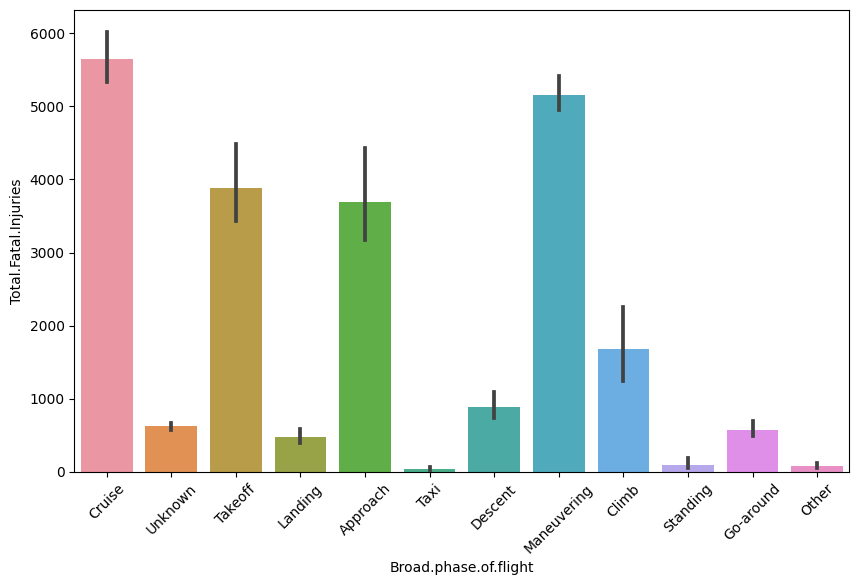

In [12]:
plt.figure(figsize=(10,6))
sns.barplot(data = df, x = df['Broad.phase.of.flight'],y= df['Total.Fatal.Injuries'], estimator = sum)
plt.xticks(rotation=45)
plt.show()

In [13]:
df.head()

,Event.Id,Investigation.Type,Event.Date,Location,Injury.Severity,Aircraft.damage,Make,Model,Number.of.Engines,Purpose.of.flight,Total.Fatal.Injuries,Weather.Condition,Broad.phase.of.flight,Year,Month,Day,City,State
0,20001218X45444,Accident,1948-10-24,"MOOSE CREEK, ID",Fatal,Destroyed,STINSON,108-3,1.0,Personal,2.0,Unknown,Cruise,1948,October,Sunday,MOOSE CREEK,ID
1,20001218X45447,Accident,1962-07-19,"BRIDGEPORT, CA",Fatal,Destroyed,PIPER,PA24-180,1.0,Personal,4.0,Unknown,Unknown,1962,July,Thursday,BRIDGEPORT,CA
2,20061025X01555,Accident,1974-08-30,"SALTVILLE, VA",Fatal,Destroyed,CESSNA,172M,1.0,Personal,3.0,IMC,Cruise,1974,August,Friday,SALTVILLE,VA
3,20001218X45448,Accident,1977-06-19,"EUREKA, CA",Fatal,Destroyed,ROCKWELL,112,1.0,Personal,2.0,IMC,Cruise,1977,June,Sunday,EUREKA,CA
6,20001218X45446,Accident,1981-08-01,"COTTON, MN",Fatal,Destroyed,CESSNA,180,1.0,Personal,4.0,IMC,Unknown,1981,August,Saturday,COTTON,MN


<Axes: xlabel='Aircraft.damage', ylabel='Total.Fatal.Injuries'>

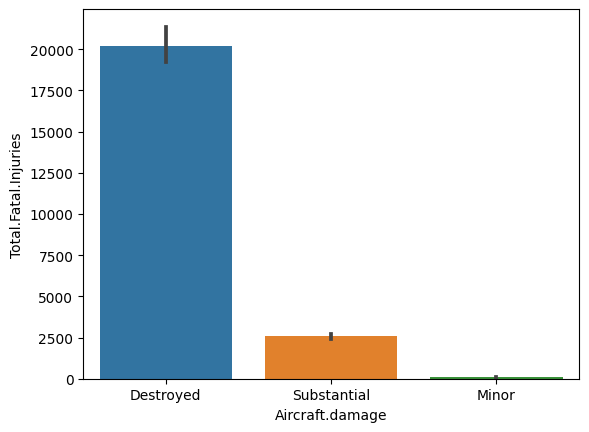

In [14]:
sns.barplot(data = df,x=df['Aircraft.damage'],y=df['Total.Fatal.Injuries'],estimator=sum)

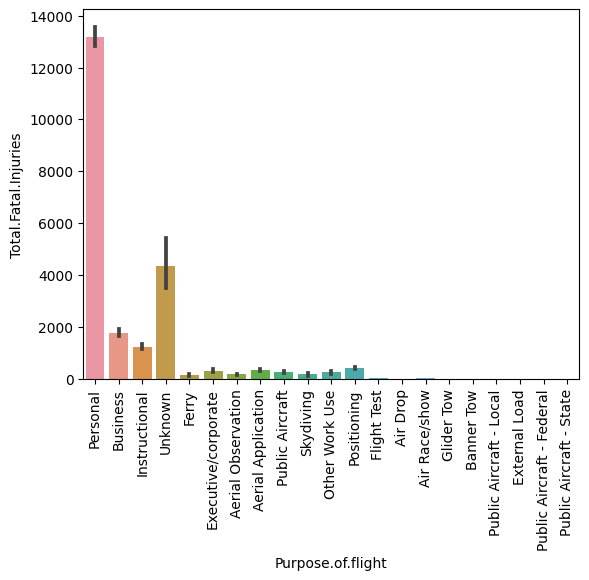

In [15]:
sns.barplot(data = df,x=df['Purpose.of.flight'],y=df['Total.Fatal.Injuries'],estimator=sum)
plt.xticks(rotation=90);

<Axes: xlabel='Injury.Severity', ylabel='Total.Fatal.Injuries'>

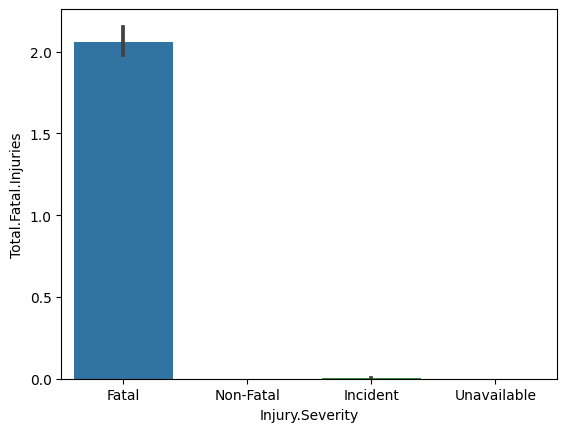

In [16]:
sns.barplot(data=df,x='Injury.Severity',y='Total.Fatal.Injuries') #potencjalna kolumna do wyrzucenia


<Axes: xlabel='Weather.Condition', ylabel='Total.Fatal.Injuries'>

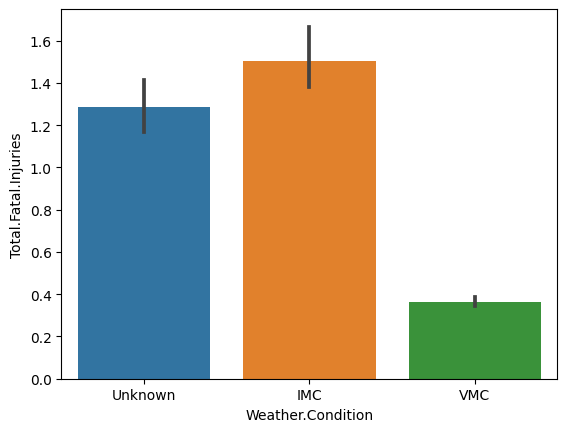

In [17]:
sns.barplot(data=df,x='Weather.Condition',y='Total.Fatal.Injuries') #potencjalna kolumna do wyrzucenia

In [18]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Event.Date', 'Location',
       'Injury.Severity', 'Aircraft.damage', 'Make', 'Model',
       'Number.of.Engines', 'Purpose.of.flight', 'Total.Fatal.Injuries',
       'Weather.Condition', 'Broad.phase.of.flight', 'Year', 'Month', 'Day',
       'City', 'State'],
      dtype='object')

<Axes: xlabel='Number.of.Engines', ylabel='Total.Fatal.Injuries'>

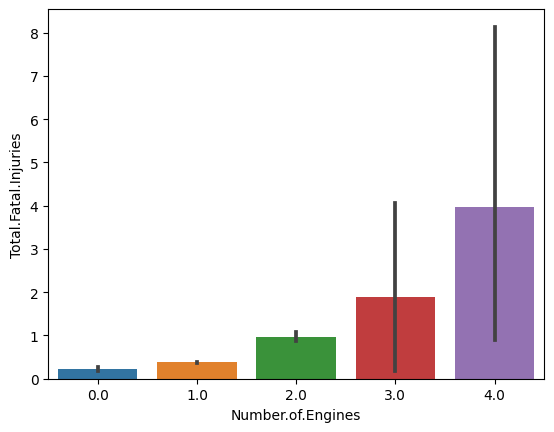

In [19]:
sns.barplot(data=df,x='Number.of.Engines',y='Total.Fatal.Injuries')

<Axes: xlabel='Year', ylabel='Total.Fatal.Injuries'>

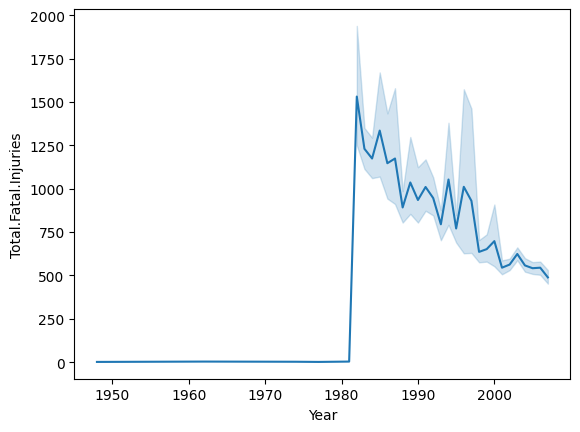

In [20]:
sns.lineplot(data=df,x=df['Year'],y=df['Total.Fatal.Injuries'],estimator=sum)

In [21]:
df

,Event.Id,Investigation.Type,Event.Date,Location,Injury.Severity,Aircraft.damage,Make,Model,Number.of.Engines,Purpose.of.flight,Total.Fatal.Injuries,Weather.Condition,Broad.phase.of.flight,Year,Month,Day,City,State
0,20001218X45444,Accident,1948-10-24,"MOOSE CREEK, ID",Fatal,Destroyed,STINSON,108-3,1.0,Personal,2.0,Unknown,Cruise,1948,October,Sunday,MOOSE CREEK,ID
1,20001218X45447,Accident,1962-07-19,"BRIDGEPORT, CA",Fatal,Destroyed,PIPER,PA24-180,1.0,Personal,4.0,Unknown,Unknown,1962,July,Thursday,BRIDGEPORT,CA
2,20061025X01555,Accident,1974-08-30,"SALTVILLE, VA",Fatal,Destroyed,CESSNA,172M,1.0,Personal,3.0,IMC,Cruise,1974,August,Friday,SALTVILLE,VA
3,20001218X45448,Accident,1977-06-19,"EUREKA, CA",Fatal,Destroyed,ROCKWELL,112,1.0,Personal,2.0,IMC,Cruise,1977,June,Sunday,EUREKA,CA
6,20001218X45446,Accident,1981-08-01,"COTTON, MN",Fatal,Destroyed,CESSNA,180,1.0,Personal,4.0,IMC,Unknown,1981,August,Saturday,COTTON,MN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63899,20080108X00030,Accident,2007-12-27,"TRAVERSE CITY, MI",Fatal,Destroyed,CESSNA,310R,2.0,Personal,1.0,IMC,Approach,2007,December,Thursday,TRAVERSE CITY,MI
63900,20080102X00006,Accident,2007-12-28,"MURRIETA, CA",Non-Fatal,Substantial,HEIN,Sonex,1.0,Personal,0.0,VMC,Cruise,2007,December,Friday,MURRIETA,CA
63906,20080103X00010,Accident,2007-12-29,"CROWLEY, TX",Fatal,Destroyed,ALTHOUSE,RAF 2000 GTX,1.0,Personal,2.0,VMC,Maneuvering,2007,December,Saturday,CROWLEY,TX
63908,20080109X00032,Accident,2007-12-30,"CHEROKEE, AL",Fatal,Substantial,BELL,206L-3,1.0,Other Work Use,3.0,VMC,Maneuvering,2007,December,Sunday,CHEROKEE,AL
